In [15]:
import os
import subprocess
import pandas as pd
import io
import matplotlib.pyplot as plt

In [219]:
result = subprocess.run(
    ['../bin/andrade', '../../sample_data/data.dat', '50', '0.4'],
    stdout=subprocess.PIPE, universal_newlines=True, check=True
)
df = pd.read_csv(io.StringIO(result.stdout), sep=" ", header=None, names=['x', 'y', 'cluster_id'])

In [220]:
clusters = df.groupby('cluster_id')

[]

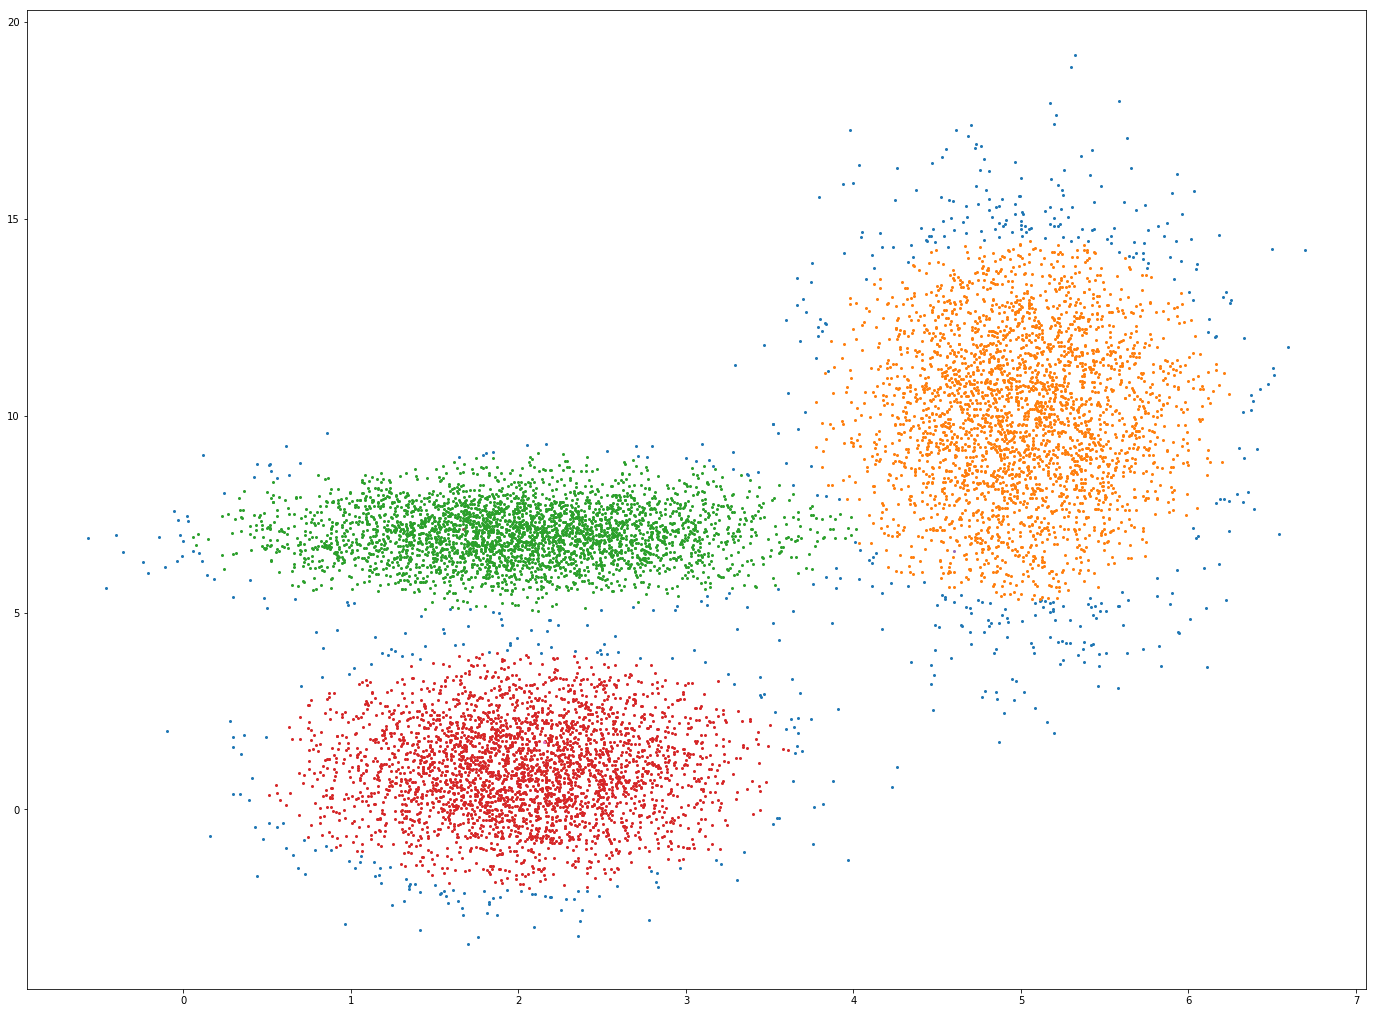

In [222]:
plt.figure(figsize=(24,18))
for clusterId, grp in clusters:
    plt.scatter(grp['x'], grp['y'], s=4)
plt.plot()